In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import FixedPoint, Manifold
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use('lateky')
import numpy as np
from pathlib import Path
import os

In [2]:
### Creating the pyoculus problem object
print("\nCreating the pyoculus problem object\n")

separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 6, "n": -1, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)


Creating the pyoculus problem object

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12


In [3]:
### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")


Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.37061925 0.29572031] - dtheta : 0.10193215420137824
0 - [StepR, StepZ]: [-0.0234823  -0.02119928]
1 - RZ : [ 6.19212661 -4.49101784] - rhotheta : [ 3.80382127 -1.62918429]
1 - [DeltaR, DeltaZ] : [-0.1651057  -0.17691821] - dtheta : 0.03870184501476204
1 - [StepR, StepZ]: [0.00515258 0.00348819]
2 - RZ : [ 6.19727919 -4.48752965] - rhotheta : [ 3.80004156 -1.62788424]
2 - [DeltaR, DeltaZ] : [-0.01794846 -0.03057362] - dtheta : 0.004221405063228989
2 - [StepR, StepZ]: [ 0.00628992 -0.00868501]
3 - RZ : [ 6.20356912 -4.49621466] - rhotheta : [ 3.80835957 -1.6261052 ]
3 - [DeltaR, DeltaZ] : [0.00043682 0.00019993] - dtheta : 0.00011163054962359809
3 - [StepR, StepZ]: [ 6.34979259e-05 -1.46029593e-04]
4 - RZ : [ 6.20363261 -4.49636069] - rhotheta : [ 3.80850187 -1.62608643]
4 - [DeltaR, DeltaZ] : [-9.16437068e-08 -1.17926463e-07] - dtheta : 2.2316885006645748e-08
4 - [StepR, StepZ]: [ 1.73404526e-08 -2.

In [4]:
current_folder = Path('').absolute()
latexplot_folder = Path("../../latex/images/plots").absolute()
os.chdir(latexplot_folder)
from plot_poincare import plot_poincare_pyoculus
os.chdir(current_folder)

In [5]:
xydata = np.load(latexplot_folder / "toytok-6-1/poincare.npy")

In [6]:
neps = 50
nintersect = 9

In [8]:
iparams = dict()
iparams["rtol"] = 1e-12

manifold = Manifold(pyoproblem, fixedpoint, fixedpoint, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(signs=[[1, 1], [1, 1]])

print("\nComputing the manifold\n")
manifold.compute(nintersect = nintersect, neps = neps,  eps_s=1e-6, eps_u=1e-6, directions='inner')


Computing the manifold

2024-06-08 10:30:35 [info     ] Computing manifold for directions [inner/outer/both]: inner
2024-06-08 10:30:35 [info     ] Computing unstable manifold...
2024-06-08 10:30:40 [info     ] Computing stable manifold...


In [9]:
evolution = manifold.inner['lfs']

In [10]:
import pyperclip
def onclick(event):
    coords = (event.xdata, event.ydata)
    text = f"{coords[0]}, {coords[1]}"
    pyperclip.copy(text)
    print(f"Position copied to clipboard: {text}")

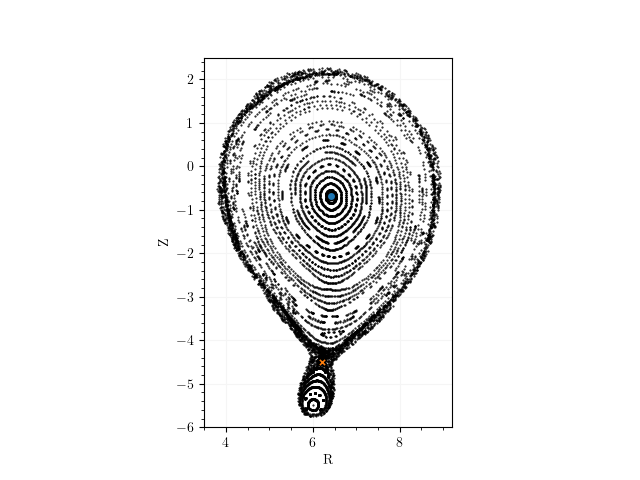

Position copied to clipboard: 4.885804356331432, 2.0461835324506215


In [19]:
fig, ax = plt.subplots()
fig, ax = plot_poincare_pyoculus(xydata, ax)
fig.canvas.mpl_connect('button_press_event', onclick)

ax.set_aspect("equal")
ax.scatter(
        pyoproblem._R0, pyoproblem._Z0, marker="o", edgecolors="black", linewidths=1, zorder=11
    )
ax.scatter(
    results[0][0], results[0][2], marker="X", edgecolors="black", linewidths=1, zorder=11
)

In [12]:
styledict = {
    "arrowwidth": 13,
    "init_point_size": 15,
    "linewidth": 1,
    "fontsize": 12
}

In [15]:
textpos = np.array([
                    [[6.20362, -4.496345], [6.20365, -4.49635]],
                    [[6.203333669339457, -4.496002821596208], [6.204044354823329, -4.496099595789755]],
                    [[6.194285533384843, -4.486493076023911], [6.2164034987528085, -4.4887668855477205]],
                    [[6.021202290060593, -4.3029348558889975], [6.465727551955984, -4.33603780092376]],
                    [[5.069787040314116, -3.565288329021239], [7.7375359580630345, -3.5882861645190745]],
                    [[3.7129147459418212, -1.5184809697138801], [8.979419074946152, 0.6893112380783277]],
                    [[3.6899169104439857, 1.1032722770393661], [7.55355327408035, 2.3221575584246477]],
                    [[8.795436390963468, 1.2182614545285446], [3.827903923430999, -1.77145716019007]],
                    [[8.26648617451325, -3.1743251255580356], [4.839808685335761, -3.4043034805363903]],
                    [[6.557312346930061, -4.576086823714776], [5.841741166667323, -4.38941608103754]],
                ])
lims = np.array([
                 [[6.20361, 6.20366], [-4.49637, -4.49633]], 
                 [[6.2030, 6.2045],[-4.4965, -4.4955]],
                 [[6.18, 6.23],[-4.5056, -4.4674]],
                 [[5.7, 6.8],[-4.7, -3.8]],
                 [[3.5, 9.2],[-6, 2.5]],
                 [[3.5, 9.2],[-6, 2.5]],
                 [[3.5, 9.2],[-6, 2.5]],
                 [[3.5, 9.2],[-6, 2.5]],
                 [[3.5, 9.2],[-6, 2.5]],
                 [[5.4, 7],[-6, -3.7]],
                ])

for i in range(nintersect+1):
    if i != 9:
        continue

    # stable
    stable = evolution['stable'][:,i]
    ax.plot(stable[::2], stable[1::2], '.-', color='green', linewidth=styledict["linewidth"], zorder=12)
    ax.scatter(stable[0], stable[1], s=styledict["init_point_size"], marker='s', color='green', linewidth=3, zorder=12)
    ax.text(*textpos[i][0], f'{i}', color='green', fontsize=styledict["fontsize"])
    ax.annotate('', xy=stable[-2:], xytext=stable[-4:-2],
                arrowprops=dict(facecolor='green', edgecolor='none', shrink=0.05, width=1, headwidth=styledict["arrowwidth"]),
                zorder=12)

    # unstable
    unstable = evolution['unstable'][:,i]
    ax.plot(unstable[::2], unstable[1::2], '.-', color='red', linewidth=styledict["linewidth"], zorder=12)
    ax.scatter(unstable[0], unstable[1], s=styledict["init_point_size"], marker='s', color='red', linewidth=3, zorder=12)
    ax.text(*textpos[i][1], f'{i}', color='red', fontsize=styledict["fontsize"])
    ax.annotate('', xy=unstable[-2:], xytext=unstable[-4:-2],
                arrowprops=dict(facecolor='red', edgecolor='none', shrink=0.05, width=1, headwidth=styledict["arrowwidth"]),
                zorder=12)

    ax.set_xlim(lims[i][0])
    ax.set_ylim(lims[i][1])